In [19]:
import math
import time
import numpy as np
import pylab as pl
import random as rnd
from __future__ import unicode_literals
%matplotlib inline

# Quicksort vs Insertion Sort

El objetivo del presente laboratorio es determinar el número de elementos K en un arreglo, tal que si el arreglo tiene K o menos elementos, es más eficiente usar el algoritmo de Insertion Sort que de Quicksort para llevar a cabo el ordenamiento. En este sentido, tenemos en primer lugar la siquiente implementación de Insertion Sort:

In [13]:
def insertion_sort(N):
    for j in range(1, len(N)):
        key = N[j]
        i = j
        while i > 0 and N[i-1] > key:
            N[i] = N[i-1]
            i -= 1
        N[i] = key
    return N

Para la implementación de Quicksort tenemos las siguientes funciones en python:

In [14]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q-1)
        quicksort(A, q + 1, r)
    return A

In [15]:
def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A [i + 1], A[r] = A[r], A[i + 1]
    return i + 1

Para medir los tiempos que toma realizar el ordenamiento de 50 arreglos con tamaños 1 hasta 50, cuyos elementos están aleatoriamente ordenador, por medio de Insertion Sort, se tiene la siguiente función:

In [16]:
def time_insertion(n):
    results = []
    for i in range(1, n + 1):
        l = range(i)
        rnd.shuffle(l)
        start_time = time.clock()
        insertion_sort(l)
        end_time = time.clock()
        results.append(end_time - start_time)
    return results

De forma similar, se tiene otra función para calcular los tiempos de ejecución de Quicksort. No obstante se tiene una diferencia fundamental. Para cada tamaño de arreglo considerado, se ejecuta 10 veces el ordenamiento alterando aleatoriamente la ubicación de los elementos. Posteriormente se calcula el promedio del tiempo de las ejecuciones y este resultado se agrega a la lista de tiempos:

In [31]:
def time_quicksort(n):
    results = []
    for i in range(1, n + 1):
        sums = 0
        for j in range(10):
            l = range(i)
            rnd.shuffle(l)
            start_time = time.clock()
            quicksort(l, 0, len(l)-1)
            end_time = time.clock()
            sums += (end_time - start_time)
        results.append(sums/10.0)
    return results

Los resultados se almacenan en dos listas:

In [35]:
results_QS = time_quicksort(40)
results_IS = time_insertion(40)

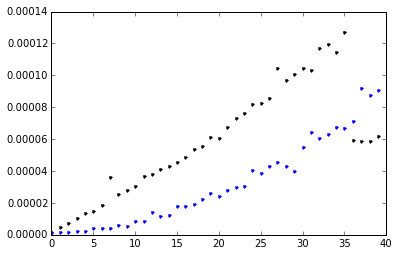

In [38]:
pl.clf()
x = np.arange(40)
pl.plot(x, results_QS, 'k.', results_IS, 'b.')

Los puntos negros corresponden a los tiempos de ejecución promedio de Quicksort, y los puntos azules a los tiempos de ejecución de insertion sort (los cuales no cambian). Es posible apreciar que para un tamaño de arreglo K <= 35, el algoritmo de Insertion Sort resulta ser más eficiente.